In [1]:
import pandas as pd
df_raw_tripadvisor = pd.read_excel(open('data/property-tripadvisor-reviews.xlsx', 'rb'), sheet_name='Data') 

In [2]:
df_new_tripadvisor = df_raw_tripadvisor[['lang', 'placeInfo/name', 'rating', 'text',
                                          'travelDate', 'tripType', 'user/userLocation/name']]
df_new_tripadvisor = df_new_tripadvisor.rename(columns={'placeInfo/name':'hotel','user/userLocation/name':'userLocation'})


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify NaN values
df_new_tripadvisor['tripType'] = df_new_tripadvisor['tripType'].replace('NONE', np.nan)
nan_values = df_new_tripadvisor.isnull()

# Count NaN values
nan_counts = nan_values.sum()

# Print NaN counts for each column
print(nan_counts)

lang               0
hotel              0
rating             0
text               0
travelDate         1
tripType        1682
userLocation    8936
dtype: int64


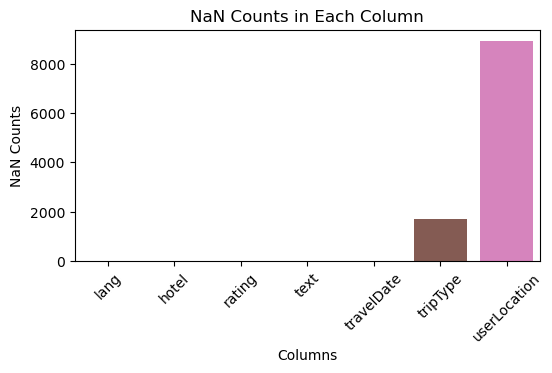

In [4]:

# Visualize NaN counts
plt.figure(figsize=(6, 3))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.title('NaN Counts in Each Column')
plt.xlabel('Columns')
plt.ylabel('NaN Counts')
plt.xticks(rotation=45)
plt.show()

In [5]:
columns_to_check = ['travelDate', 'tripType']
df_cleaned_tripadvisor = df_new_tripadvisor.dropna(subset=columns_to_check)
nan_values = df_cleaned_tripadvisor.isnull()
nan_counts = nan_values.sum()
print(nan_counts)

lang               0
hotel              0
rating             0
text               0
travelDate         0
tripType           0
userLocation    8192
dtype: int64


In [6]:
duplicate_rows = df_cleaned_tripadvisor[df_cleaned_tripadvisor.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 2


In [7]:
df_cleaned_tripadvisor = df_cleaned_tripadvisor.drop_duplicates()

duplicate_rows = df_cleaned_tripadvisor[df_cleaned_tripadvisor.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_polarity(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

# Add a new column with sentiment polarity
df_cleaned_tripadvisor['sentimentPolarity'] = df_cleaned_tripadvisor['text'].apply(calculate_polarity)
df_cleaned_tripadvisor.head()

,lang,hotel,rating,text,travelDate,tripType,userLocation,sentimentPolarity
0,en,"Villa Park, Maldives",5,An excellent hotel for a family holiday. Durin...,2024-03,FAMILY,"Punta Cana, Dominican Republic",0.9923
1,en,"Villa Park, Maldives",5,Second time on the island. 12/2023\n\nEvery ti...,2023-12,COUPLES,NaN,0.9948
2,ru,"Villa Park, Maldives",5,"Отличный отель, все понравилось, номера чистые...",2024-03,COUPLES,NaN,0.0000
3,en,"Villa Park, Maldives",5,"Wonderful place, beautiful, very well-kept hot...",2024-02,FRIENDS,NaN,0.9898
4,en,"Villa Park, Maldives",5,We spent the most wonderful 10 days at Villa P...,2024-03,COUPLES,NaN,0.9928


In [9]:
domain_keywords = {
    'Accommodation': ['hotel', 'accommodation', 'lodging', 'inn', 'resort', 'motel', 'guesthouse'],
    'Attractions': ['attractions', 'sights', 'tourist spots', 'landmarks', 'monuments', 'parks', 'museums'],
    'Food': ['food', 'restaurant', 'cuisine', 'dining', 'eatery', 'cafe', 'bistro'],
    'Services': ['service', 'customer service', 'hospitality', 'assistance', 'support', 'amenities', 'facilities']
}

def assign_category(text):
    for category, keywords in domain_keywords.items():
        if any(word in text.lower() for word in keywords):
            return category
    return 'Other'

# Create new column "text_category" and assign identified category
df_cleaned_tripadvisor['reviewCategory'] = df_cleaned_tripadvisor['text'].apply(assign_category)
df_cleaned_tripadvisor.head()

,lang,hotel,rating,text,travelDate,tripType,userLocation,sentimentPolarity,reviewCategory
0,en,"Villa Park, Maldives",5,An excellent hotel for a family holiday. Durin...,2024-03,FAMILY,"Punta Cana, Dominican Republic",0.9923,Accommodation
1,en,"Villa Park, Maldives",5,Second time on the island. 12/2023\n\nEvery ti...,2023-12,COUPLES,NaN,0.9948,Food
2,ru,"Villa Park, Maldives",5,"Отличный отель, все понравилось, номера чистые...",2024-03,COUPLES,NaN,0.0000,Other
3,en,"Villa Park, Maldives",5,"Wonderful place, beautiful, very well-kept hot...",2024-02,FRIENDS,NaN,0.9898,Accommodation
4,en,"Villa Park, Maldives",5,We spent the most wonderful 10 days at Villa P...,2024-03,COUPLES,NaN,0.9928,Other


In [10]:
def get_season(month):
    if month in ['12', '01', '02']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    else:
        return 'autumn'
    
df_cleaned_tripadvisor['Month'] = df_cleaned_tripadvisor['travelDate'].str.split('-').str[1]
df_cleaned_tripadvisor['Season'] = df_cleaned_tripadvisor['Month'].apply(get_season)
df_cleaned_tripadvisor.head()

,lang,hotel,rating,text,travelDate,tripType,userLocation,sentimentPolarity,reviewCategory,Month,Season
0,en,"Villa Park, Maldives",5,An excellent hotel for a family holiday. Durin...,2024-03,FAMILY,"Punta Cana, Dominican Republic",0.9923,Accommodation,03,Spring
1,en,"Villa Park, Maldives",5,Second time on the island. 12/2023\n\nEvery ti...,2023-12,COUPLES,NaN,0.9948,Food,12,Winter
2,ru,"Villa Park, Maldives",5,"Отличный отель, все понравилось, номера чистые...",2024-03,COUPLES,NaN,0.0000,Other,03,Spring
3,en,"Villa Park, Maldives",5,"Wonderful place, beautiful, very well-kept hot...",2024-02,FRIENDS,NaN,0.9898,Accommodation,02,Winter
4,en,"Villa Park, Maldives",5,We spent the most wonderful 10 days at Villa P...,2024-03,COUPLES,NaN,0.9928,Other,03,Spring


In [11]:
# save final data frame to a csv file.
df_cleaned_tripadvisor.to_csv('final_review_data.csv', index=False)

In [ ]:
average_polarity = df_cleaned_tripadvisor.groupby('tripType')['sentimentPolarity'].mean().reset_index()

# Visualize average polarity scores
plt.figure(figsize=(6, 3))
plt.bar(average_polarity['tripType'], average_polarity['sentimentPolarity'], color='skyblue')
plt.title('Average Sentiment Polarity Score by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Average Sentiment Polarity Score')
plt.ylim(-1, 1)  # Set y-axis limit from -1 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)  # Add horizontal line at y=0
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_polarity = df_cleaned_tripadvisor.groupby('reviewCategory')['sentimentPolarity'].mean().reset_index()

# Visualize average polarity scores
plt.figure(figsize=(6, 3))
plt.bar(average_polarity['reviewCategory'], average_polarity['sentimentPolarity'], color='skyblue')
plt.title('Average Sentiment Polarity Score by Review Category')
plt.xlabel('Review Category')
plt.ylabel('Average Sentiment Polarity Score')
plt.ylim(-1, 1)  # Set y-axis limit from -1 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)  # Add horizontal line at y=0
plt.xticks(rotation=45)
plt.show()